In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


# Check the convergence of nonlinear equation solver with different methods

ASTR 660, Computational Astrophysics

2019.03.20

In [39]:
fn_bisection = "bisection1.txt"
fn_false     = "false1.txt"
fn_newton    = "newton1.txt"
fn_secant    = "secant1.txt"

In [40]:
db_bisection = np.loadtxt(fn_bisection,unpack=True)
db_false     = np.loadtxt(fn_false,unpack=True)
db_newton    = np.loadtxt(fn_newton,unpack=True)
db_secant    = np.loadtxt(fn_secant,unpack=True)

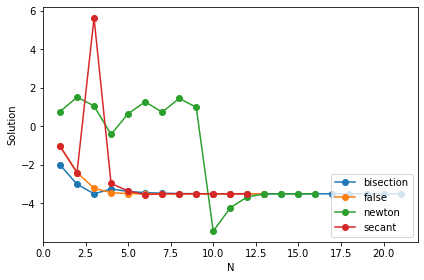

In [41]:
plt.figure(figsize=(6,4))
plt.plot(db_bisection[0],db_bisection[1],'-o',label="bisection")
plt.plot(db_false[0],db_false[1],'-o',label="false")
plt.plot(db_newton[0],db_newton[1],'-o',label="newton")
plt.plot(db_secant[0],db_secant[1],'-o',label="secant")
plt.legend(loc="lower right")
plt.xlabel("N")
plt.ylabel("Solution")
plt.tight_layout()
plt.savefig('fig_convergence_solution1.pdf')

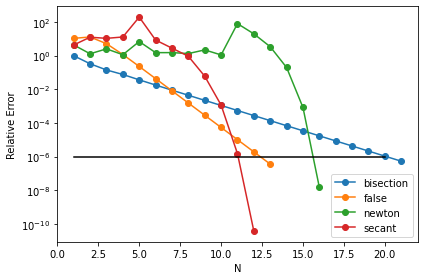

In [42]:
plt.figure(figsize=(6,4))
plt.plot(db_bisection[0],db_bisection[2],'-o',label="bisection")
plt.plot(db_false[0],db_false[2],'-o',label="false")
plt.plot(db_newton[0],db_newton[2],'-o',label="newton")
plt.plot(db_secant[0],db_secant[2],'-o',label="secant")
plt.plot([1,20],[1e-6,1e-6],'k-')
plt.legend(loc="lower right")
plt.yscale('log')
plt.xlabel("N")
plt.ylabel("Relative Error")
plt.tight_layout()
plt.savefig('fig_convergence_error1.pdf')

In [43]:
def estimate_convergence_rate(db,r):
    e0 = 1.0
    c  = np.zeros(len(db[2]))
    for k,e in enumerate(db[2]):
        c[k] = e/e0**r
        e0 = e
    return c

In [44]:
c_bisection = estimate_convergence_rate(db_bisection,r=1)
c_false     = estimate_convergence_rate(db_false,r=1)
c_newton    = estimate_convergence_rate(db_newton,r=2)
c_secant    = estimate_convergence_rate(db_secant,r=1.62)

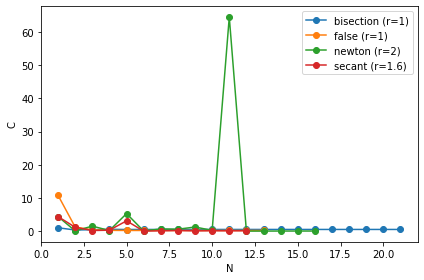

In [45]:
plt.figure(figsize=(6,4))
plt.plot(db_bisection[0],c_bisection,'-o',label="bisection (r=1)")
plt.plot(db_false[0],c_false,'-o',label="false (r=1)")
plt.plot(db_newton[0],c_newton,'-o',label="newton (r=2)")
plt.plot(db_secant[0],c_secant,'-o',label="secant (r=1.6)")
plt.legend(loc="upper right")
plt.xlabel("N")
plt.ylabel("C")
plt.tight_layout()
plt.savefig('fig_convergence_rate1.pdf')